In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Reading in shark data
data = pd.read_csv("../data/clean_sharks.csv", usecols=['Fatal (Y/N)', 'Activity'])
data.tail()

,Activity,Fatal (Y/N)
1754,"Scuba diving, attempting to catch a captive shark",N
1755,Attempting to net shark in shark channel,N
1756,Spearfishing on Scuba,N
1757,Standing,N
1758,Fishing,N


In [3]:
# cleaning activity column
data['Activity'] = data['Activity'].str.lower()

# Remove non word charcter
data['Activity'] = data['Activity'].apply(lambda x : re.sub('([^a-zA-Z]+)', ' ', x))

data.tail()

,Activity,Fatal (Y/N)
1754,scuba diving attempting to catch a captive shark,N
1755,attempting to net shark in shark channel,N
1756,spearfishing on scuba,N
1757,standing,N
1758,fishing,N


In [5]:
# instanstiate vectorizer
vectorizer = CountVectorizer()
vectorizer

# vectorize activity
activity = data['Activity']
X = vectorizer.fit_transform(activity)
X

<1759x359 sparse matrix of type '<class 'numpy.int64'>'
	with 3030 stored elements in Compressed Sparse Row format>

In [6]:
# all of the unique words
features = vectorizer.get_feature_names_out().tolist()
features[:10]

['abalone',
 'abaone',
 'above',
 'accidentally',
 'adrift',
 'after',
 'air',
 'alacatraz',
 'albacore',
 'alongside']

In [73]:
X.shape

# We have 1759 rows of data, and 359 unique words (features)

(1759, 359)

a = np.array([[0, 1, 2],
...               [0, 2, 4],
...               [0, 3, 6]])
>>> np.where(a < 4, a, -1)  # -1 is broadcast
array([[ 0,  1,  2],
       [ 0,  2, -1],
       [ 0,  3, -1]])

In [12]:
# getting data ready for naive bayes
dataX = X.toarray()
Y = data['Fatal (Y/N)']

# converting number that are >= 1 to 1! 
dataX = np.where(dataX < 1, dataX, 1)
dataX

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
# make dataframe
dataframe_X = pd.DataFrame(dataX, columns= features)
dataframe_X.head()

,abalone,abaone,above,accidentally,adrift,after,air,alacatraz,albacore,alongside,...,when,while,white,windsurfing,wing,with,wreckage,yards,yellowfin,zodiac
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df = dataframe_X
df['Fatal (Y/N)'] = Y
df.to_csv("../data/Bernoulli_NB_data.csv")
df.head()

,abalone,abaone,above,accidentally,adrift,after,air,alacatraz,albacore,alongside,...,while,white,windsurfing,wing,with,wreckage,yards,yellowfin,zodiac,Fatal (Y/N)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N


In [23]:
# Test train split
trainBern , testBern = train_test_split(df, test_size=.4)

# save labels
trainBern_label = trainBern['Fatal (Y/N)']
testBern_label = testBern['Fatal (Y/N)']

# drop label column
trainBern = trainBern.drop(['Fatal (Y/N)'], axis=1)
testBern = testBern.drop(['Fatal (Y/N)'], axis=1)

print("Training Bernoulli:", trainBern.head(4))
print("Testing Bernoulli", testBern.head(4))

Training Bernoulli:       abalone  abaone  above  accidentally  adrift  after  air  alacatraz  \
1031        0       0      0             0       0      0    0          0   
1752        0       0      0             0       0      0    0          0   
1202        0       0      0             0       0      0    0          0   
565         0       0      0             0       0      0    0          0   

      albacore  alongside  ...  when  while  white  windsurfing  wing  with  \
1031         0          0  ...     0      0      0            0     0     0   
1752         0          0  ...     0      0      0            0     0     0   
1202         0          0  ...     0      0      0            0     0     0   
565          0          0  ...     0      0      0            0     0     0   

      wreckage  yards  yellowfin  zodiac  
1031         0      0          0       0  
1752         0      0          0       0  
1202         0      0          0       0  
565          0      0     

In [16]:
# Bernoulli Model

MyBern = BernoulliNB()

MyBern_Model = MyBern.fit(trainBern, trainBern_label)

print(MyBern_Model.classes_)
print(MyBern_Model.class_count_)

# precti
Predictions_Bern = MyBern_Model.predict(testBern)
print("prediction:", Predictions_Bern)

['N' 'Y']
[1005.   50.]
prediction: ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N

In [17]:
# Print the actual probability
print(MyBern_Model.predict_proba(testBern))

print("Mean accruacy on the given test data and labels:", round(MyBern_Model.score(testBern, testBern_label),3))

[[9.53276197e-01 4.67238027e-02]
 [9.99986445e-01 1.35552505e-05]
 [9.99701795e-01 2.98205242e-04]
 ...
 [9.99982355e-01 1.76449142e-05]
 [9.99986445e-01 1.35552505e-05]
 [9.99934243e-01 6.57569846e-05]]
Mean accruacy on the given test data and labels: 0.955


[[665  14]
 [ 18   7]]


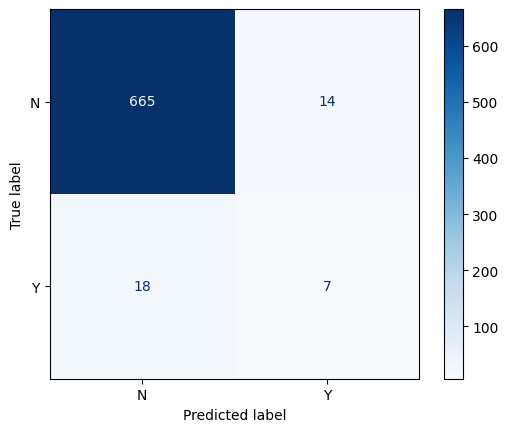

In [18]:
# Confusion matrix
Confusion = confusion_matrix(testBern_label, Predictions_Bern)
print(Confusion)

display = ConfusionMatrixDisplay(confusion_matrix=Confusion, display_labels=MyBern_Model.classes_)
display.plot(cmap='Blues')
plt.show()
